In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
PriceAvailDB = pd.read_csv('./Data/Price And Availability Data Cleaned.csv')# Read Data

In [39]:
print(PriceAvailDB.head())# Print first 5 rows of the data

   year quarter     market internal_class        RBA  available_space  \
0  2019      Q1    Atlanta              A  103783385         21115998   
1  2019      Q1    Atlanta              O   66290064         12085998   
2  2019      Q1     Austin              A   38276350          4087849   
3  2019      Q1     Austin              O   27947525          3214837   
4  2019      Q1  Baltimore              A   41915202          7386483   

   availability_proportion  internal_class_rent  overall_rent  \
0                 0.203462            30.044474     26.652200   
1                 0.182320            20.385196     26.652200   
2                 0.106798            40.593122     36.010224   
3                 0.115818            30.214287     36.010224   
4                 0.176224            26.293374     23.838594   

   direct_available_space  direct_availability_proportion  \
0              18625950.0                          0.1095   
1              11135117.0                       

In [30]:
missing_values = PriceAvailDB.isnull().sum()
print(missing_values)

year                                0
quarter                             0
market                              0
internal_class                      0
RBA                                 0
available_space                     0
availability_proportion             0
internal_class_rent                 0
overall_rent                        0
direct_available_space            300
direct_availability_proportion    300
direct_internal_class_rent        300
direct_overall_rent               300
sublet_available_space            300
sublet_availability_proportion    300
sublet_internal_class_rent        300
sublet_overall_rent               300
leasing                             0
dtype: int64


In [40]:
print(PriceAvailDB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            1380 non-null   int64  
 1   quarter                         1380 non-null   object 
 2   market                          1380 non-null   object 
 3   internal_class                  1380 non-null   object 
 4   RBA                             1380 non-null   int64  
 5   available_space                 1380 non-null   int64  
 6   availability_proportion         1380 non-null   float64
 7   internal_class_rent             1380 non-null   float64
 8   overall_rent                    1380 non-null   float64
 9   direct_available_space          1380 non-null   float64
 10  direct_availability_proportion  1380 non-null   float64
 11  direct_internal_class_rent      1380 non-null   float64
 12  direct_overall_rent             13

In [32]:
#convert year to datetime
PriceAvailDB['year'] = pd.to_datetime(PriceAvailDB['year'], format='%Y')



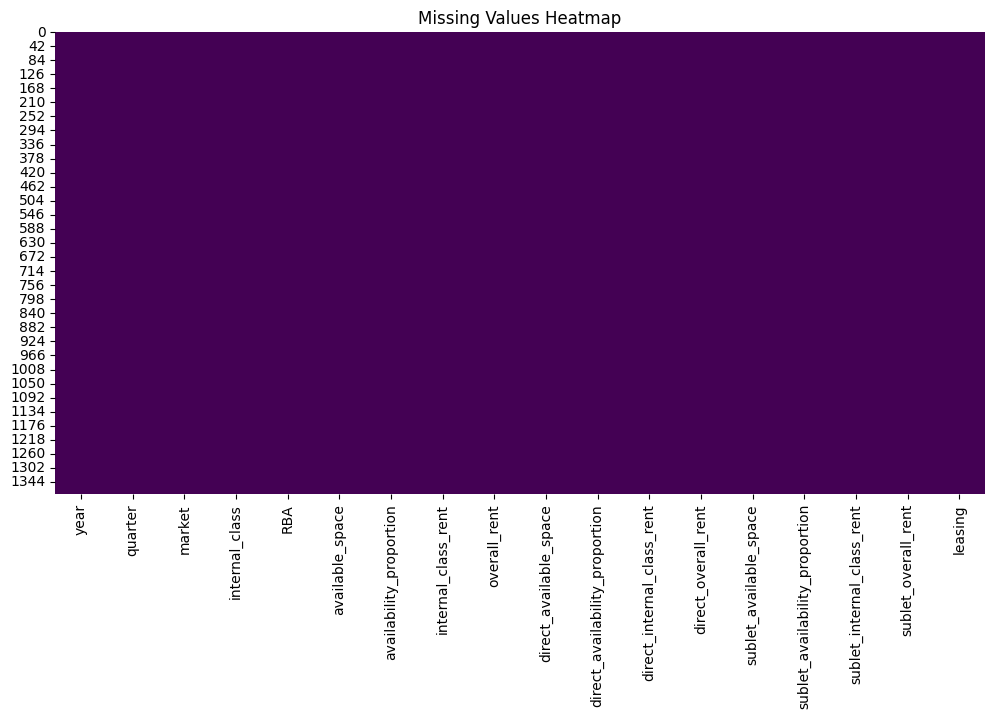

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(PriceAvailDB.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [34]:
numeric_columns = [
    'RBA',
    'available_space',
    'availability_proportion',
    'internal_class_rent',
    'overall_rent',
    'direct_available_space',
    'direct_availability_proportion',
    'direct_internal_class_rent',
    'direct_overall_rent',
    'sublet_available_space',
    'sublet_availability_proportion',
    'sublet_internal_class_rent',
    'sublet_overall_rent',
    'leasing'
]


for col in numeric_columns:
    PriceAvailDB[col] = pd.to_numeric(PriceAvailDB[col], errors='coerce')

In [37]:
# Drop rows with missing values in numeric columns
PriceAvailDB.dropna(subset=numeric_columns, inplace=True)

In [36]:
# Save back to CSV
PriceAvailDB.to_csv('./Data/Price And Availability Data Cleaned.csv', index=False)

PermissionError: [Errno 13] Permission denied: './Data/Price And Availability Data Cleaned.csv'

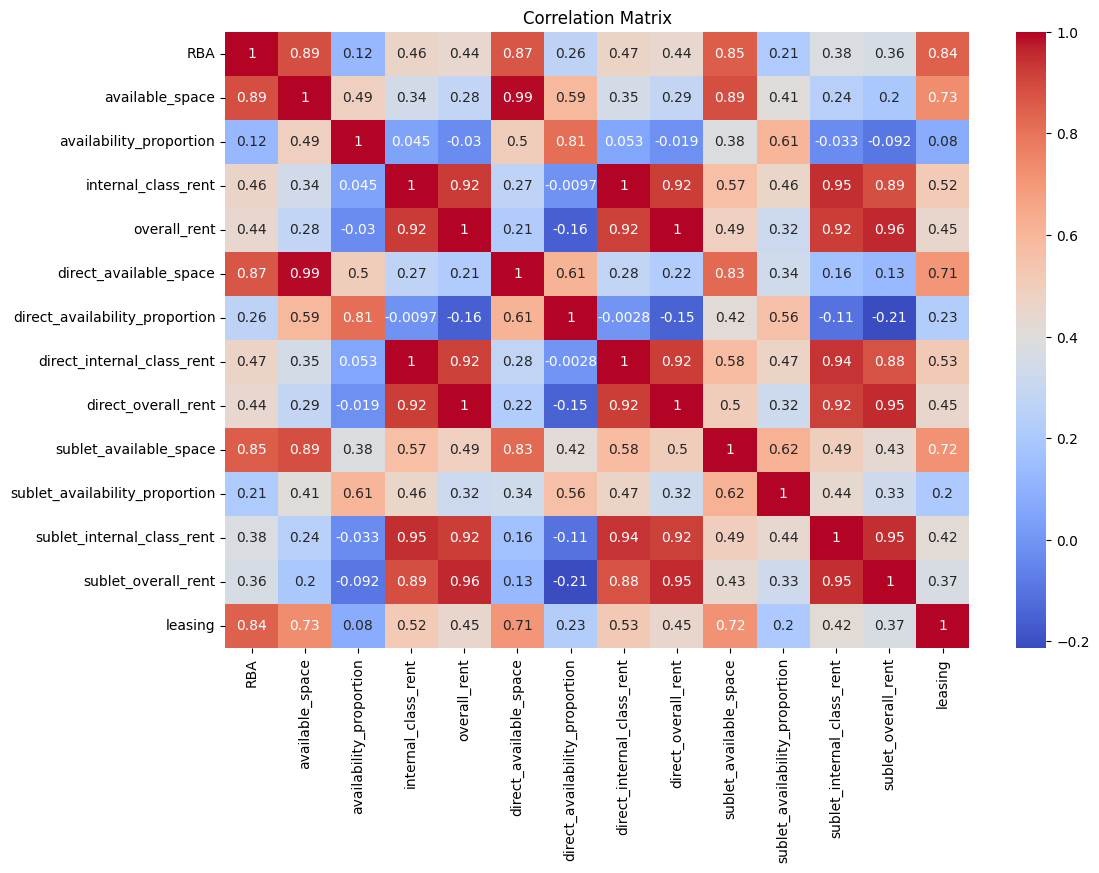

In [42]:
## Data Visualization
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = PriceAvailDB[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

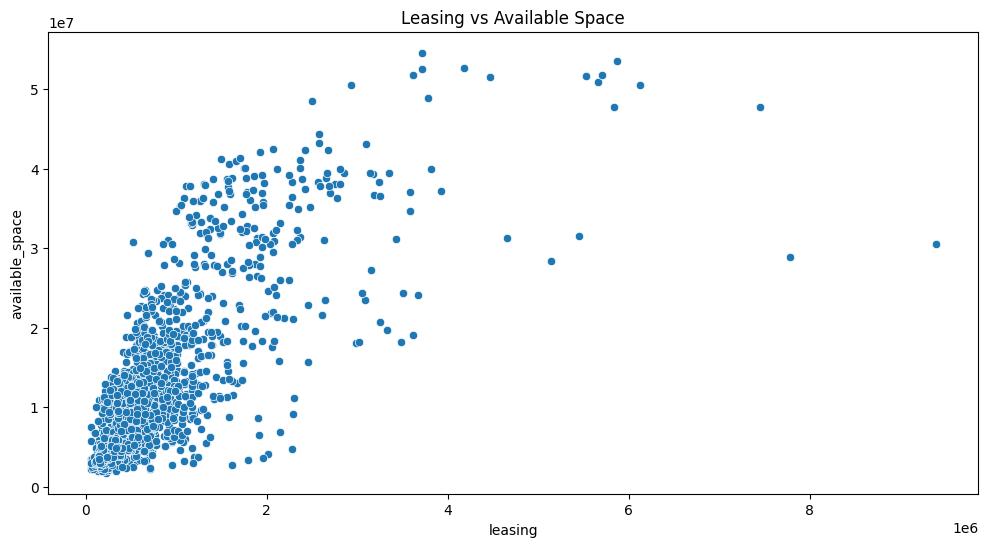

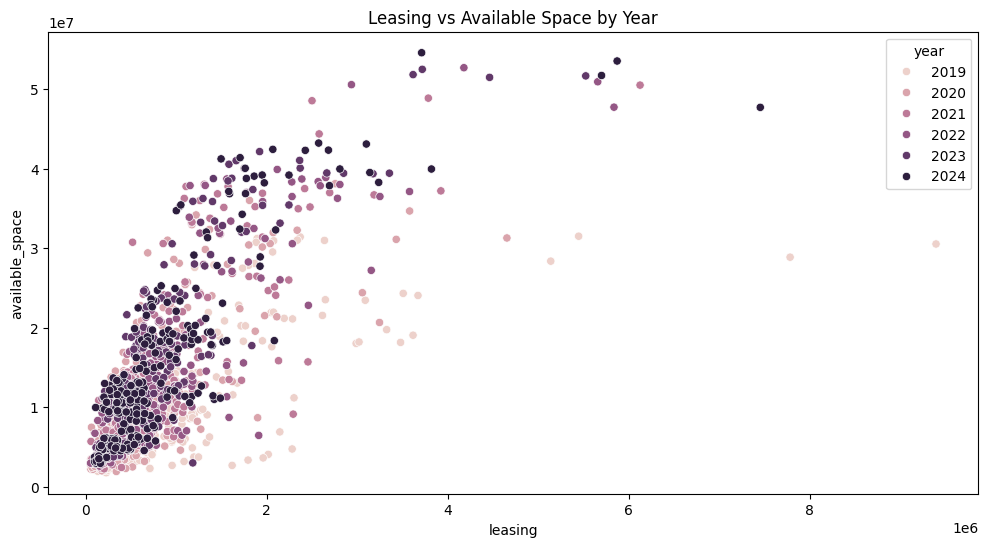

In [ ]:
# plot leasing and available_space
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', data=PriceAvailDB)
plt.title('Leasing vs Available Space')
plt.show()

# Colour by year and quarter
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', hue='year', data=PriceAvailDB)
plt.title('Leasing vs Available Space by Year')
plt.show()

# Year 2019
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', hue='quarter', data=PriceAvailDB[PriceAvailDB['year'] == '2019'])
plt.title('Leasing vs Available Space by Quarter (2019)')
plt.show()

# Year 2020
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', hue='quarter', data=PriceAvailDB[PriceAvailDB['year'] == '2020'])
plt.title('Leasing vs Available Space by Quarter (2020)')
plt.show()  

# Year 2021
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', hue='quarter', data=PriceAvailDB[PriceAvailDB['year'] == '2021'])
plt.title('Leasing vs Available Space by Quarter (2021)')
plt.show()

# Year 2022
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', hue='quarter', data=PriceAvailDB[PriceAvailDB['year'] == '2022'])
plt.title('Leasing vs Available Space by Quarter (2022)')
plt.show()

# Year 2023
plt.figure(figsize=(12, 6))
sns.scatterplot(x='leasing', y='available_space', hue='quarter', data=PriceAvailDB[PriceAvailDB['year'] == '2023'])
plt.title('Leasing vs Available Space by Quarter (2023)')
plt.show()

# Year 2024
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='leasing', y='available_space', hue='quarter', data=PriceAvailDB[PriceAvailDB['year'] == '2024'])
plt.title('Leasing vs Available Space by Quarter (2024)')
plt.show()


In [44]:
# Stats on numeric columns
stats = PriceAvailDB[numeric_columns].describe()
print(stats)

                RBA  available_space  availability_proportion  \
count  1.380000e+03     1.380000e+03              1380.000000   
mean   6.280160e+07     1.363479e+07                 0.211791   
std    4.512707e+07     1.018345e+07                 0.059747   
min    2.010185e+07     1.782779e+06                 0.057300   
25%    3.453317e+07     6.061156e+06                 0.167839   
50%    4.815789e+07     1.055947e+07                 0.206624   
75%    7.448788e+07     1.780888e+07                 0.251630   
max    2.683833e+08     5.457790e+07                 0.414977   

       internal_class_rent  overall_rent  direct_available_space  \
count          1380.000000   1380.000000            1.380000e+03   
mean             36.200807     37.147630            1.129815e+07   
std              14.517982     13.796703            8.279923e+06   
min              17.944609     20.059992            1.544029e+06   
25%              26.347854     28.527418            5.122876e+06   
50%   